In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import VAR

In [26]:
from var_model.preprocessing import ts_differencing, undo_ts_differencing, adf_test

In [27]:
def plot_all_box(df:pd.DataFrame, dataset_name:str, fig_size:tuple=(8,6)):
    plt.figure(figsize=fig_size)
    fig = sns.boxplot(data = pd.melt(df), x= "variable", y= "value")
    plt.xlabel("")
    plt.ylabel("")
    fig.set_xticklabels(df.columns, rotation=90)
    fig.set(title=f"'{dataset_name}'")
    

In [28]:
def plot_all_ts(df:pd.DataFrame, dataset_name:str, fig_size:tuple=(9,9)):
    fig, axs = plt.subplots(len(df.columns),1, sharex= True)
    for ax,col in zip(axs.flat,df.columns):
        sns.lineplot(ax= ax,data= df[col])
        ax.set_title(f"{col}")
        ax.set_ylabel(ylabel = "", rotation = 0)
    fig.set_size_inches(fig_size)
    fig.suptitle(f"'{dataset_name}'")
    fig.tight_layout()    

In [29]:
def plot_all_acf(df:pd.DataFrame, dataset_name:str, fig_size:tuple=(9,9)):
    fig, axs = plt.subplots(len(df.columns),1, sharex= True)
    for ax,col in zip(axs.flat,df.columns):
        plot_acf(ax= ax,x= df[col])
        ax.set_title(f"{col}")
        ax.set_ylabel(ylabel = "", rotation = 0)
    fig.set_size_inches(fig_size)
    fig.suptitle(f"'{dataset_name}'")
    fig.tight_layout()  

# Test all TS if stationary

## Test prsa data

In [30]:
df_prsa_data= pd.read_csv("../data/02_preprocessed/prsa_preprocessed.csv")

In [31]:
df_prsa_data.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
0,2010,1,1,0,98.613215,-21,-11.0,1021.0,1.79,0,0
1,2010,1,1,1,98.613215,-21,-12.0,1020.0,4.92,0,0
2,2010,1,1,2,98.613215,-21,-11.0,1019.0,6.71,0,0
3,2010,1,1,3,98.613215,-21,-14.0,1019.0,9.84,0,0
4,2010,1,1,4,98.613215,-20,-12.0,1018.0,12.97,0,0


In [32]:
prsa_data_cols = ["pm2.5","DEWP","TEMP","PRES","Iws","Is","Ir"]

In [33]:
df_prsa_data = df_prsa_data[prsa_data_cols]

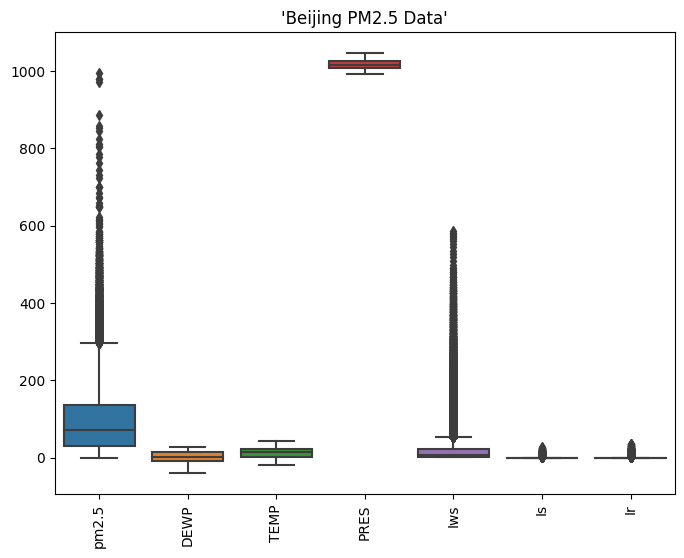

In [34]:
plot_all_box(df_prsa_data, "Beijing PM2.5 Data", (8,6))

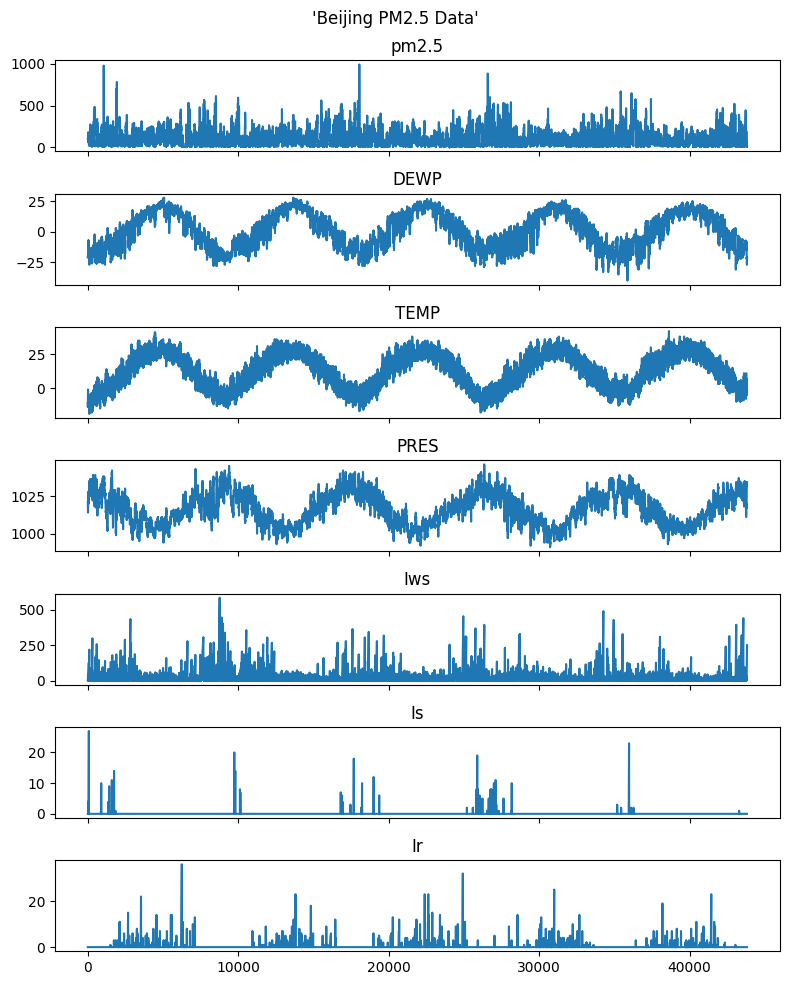

In [35]:
plot_all_ts(df_prsa_data, "Beijing PM2.5 Data", (8,10))

In [36]:
df_prsa_data_diff = ts_differencing(df_prsa_data)

In [37]:
df_prsa_data_diff.shape == df_prsa_data.shape

True

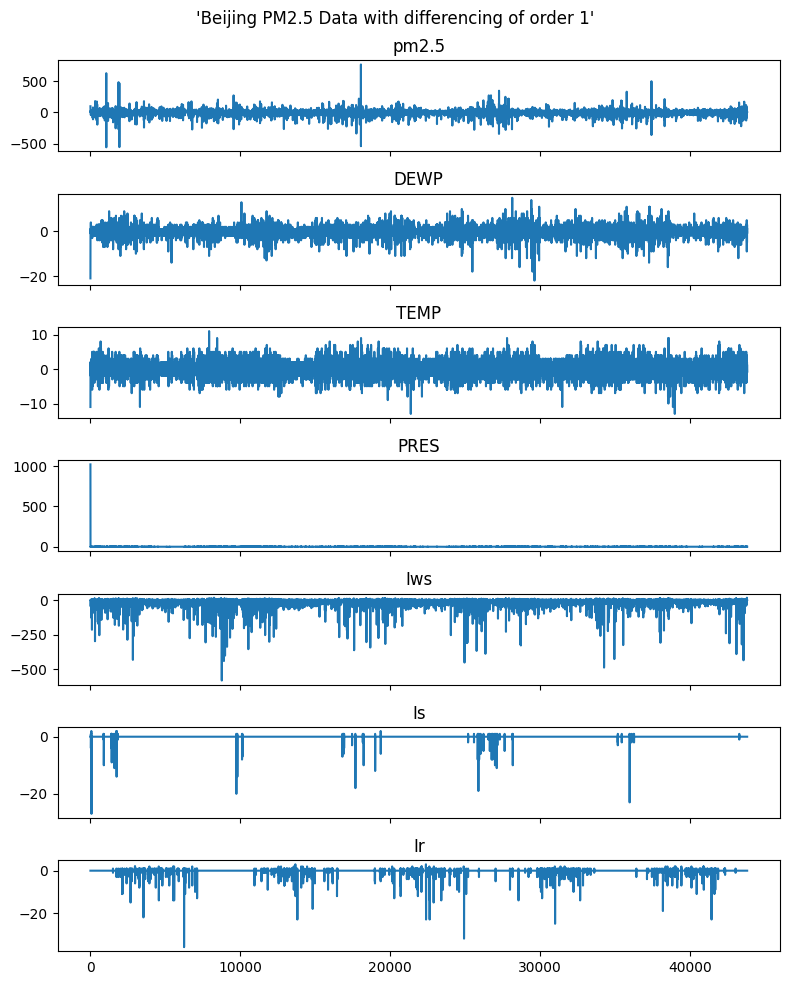

In [38]:
plot_all_ts(df_prsa_data_diff,"Beijing PM2.5 Data with differencing of order 1", (8,10))

In [39]:
adf_test(df_prsa_data_diff)

Augmented Dickey-Fuller Test: pm2.5
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: DEWP
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: TEMP
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PRES
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Iws
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Is
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: Ir
Data has no unit root and is stationary


In [40]:
df_prsa_data_diff_2 = ts_differencing(df_prsa_data, 2)

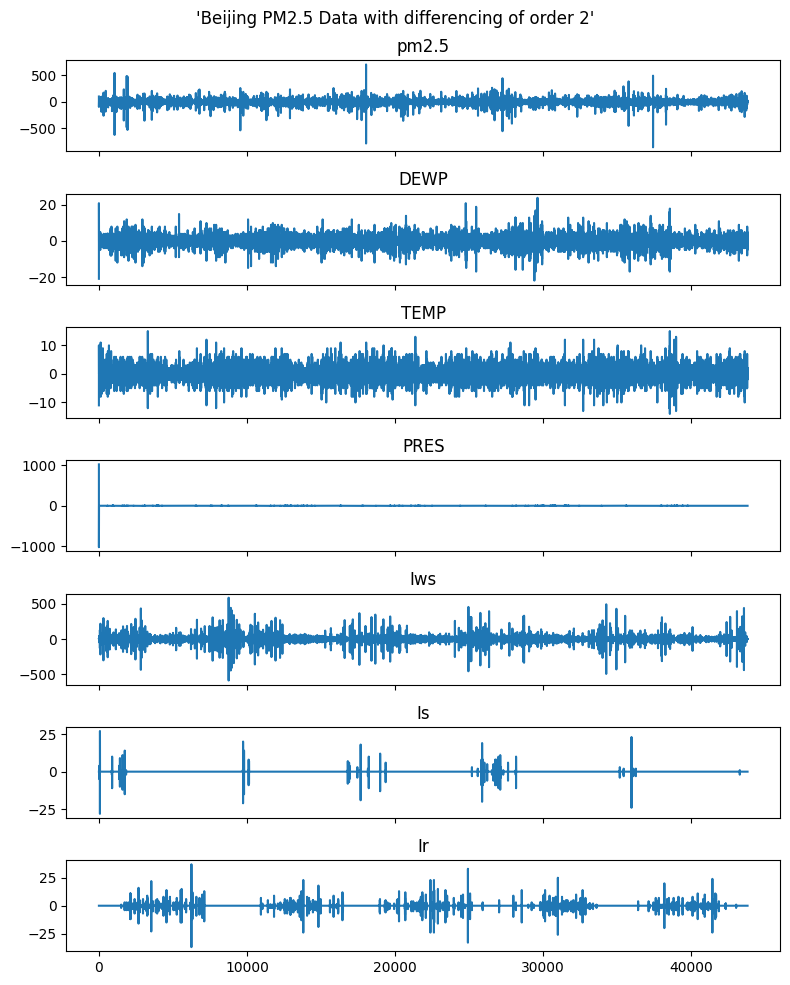

In [41]:
plot_all_ts(df_prsa_data_diff_2,"Beijing PM2.5 Data with differencing of order 2", (8,10))

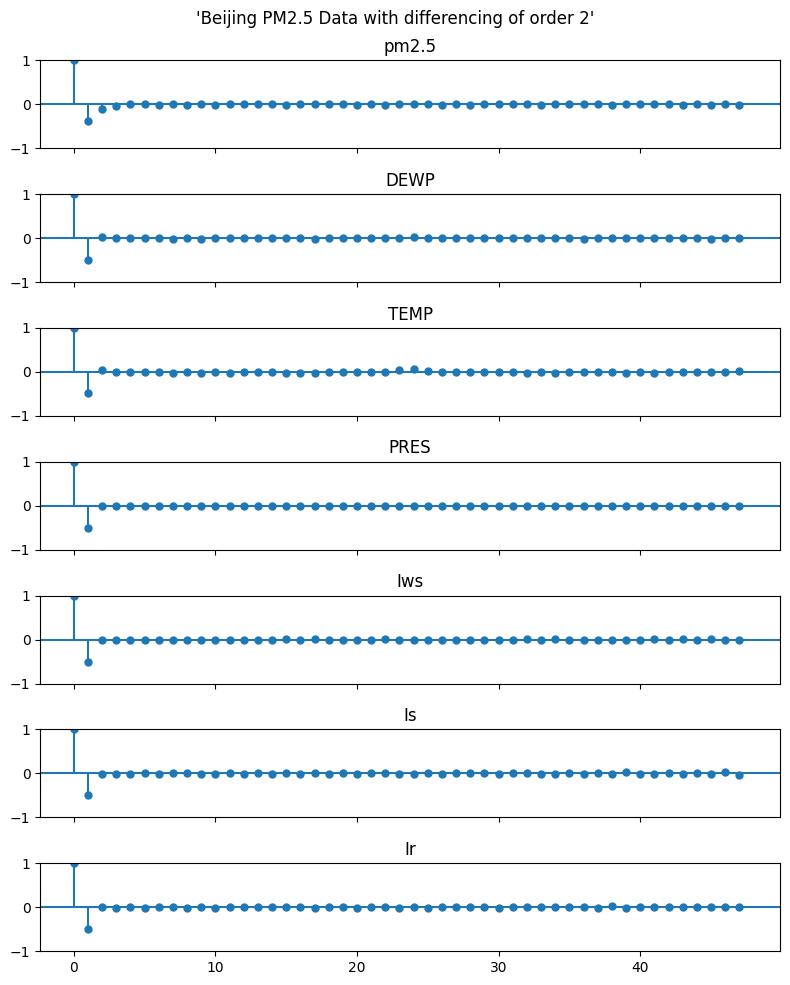

In [96]:
plot_all_acf(df_prsa_data_diff_2, "Beijing PM2.5 Data with differencing of order 2", (8,10))

In [84]:
model_prsa = VAR(df_prsa_data_diff_2)

In [88]:
model_prsa.select_order(30).summary()

,AIC,BIC,FPE,HQIC
0,13.36,13.36,6.345e+05,13.36
1,11.43,11.45,9.243e+04,11.44
2,10.76,10.78,4.700e+04,10.76
3,10.40,10.43,3.275e+04,10.41
4,10.17,10.21,2.610e+04,10.18
5,9.997,10.05,2.195e+04,10.01
6,9.855,9.915,1.906e+04,9.874
7,9.735,9.804,1.690e+04,9.757
8,9.634,9.713,1.527e+04,9.659
9,9.552,9.640,1.407e+04,9.580


## Test air quality data

In [43]:
df_air_quality = pd.read_csv("../data/02_preprocessed/air_preprocessed.csv")

In [44]:
df_air_quality.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [45]:
df_air_quality.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,275.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,275.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,275.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,275.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,275.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [46]:
df_air_quality = df_air_quality.drop(columns = ["Date","Time"])

<AxesSubplot: >

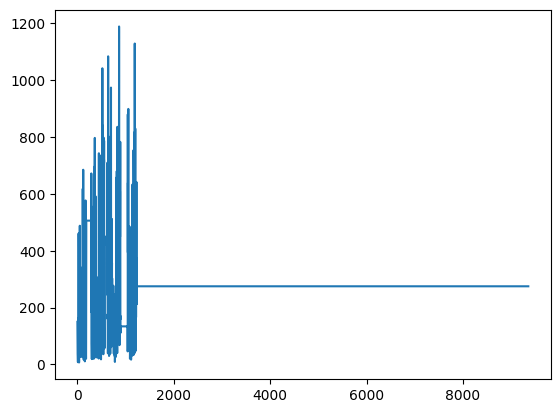

In [47]:
df_air_quality["NMHC(GT)"].plot()

NMHC(GT) column is constant after time. Every forecasting should be independent on other variables. We have to discard this column

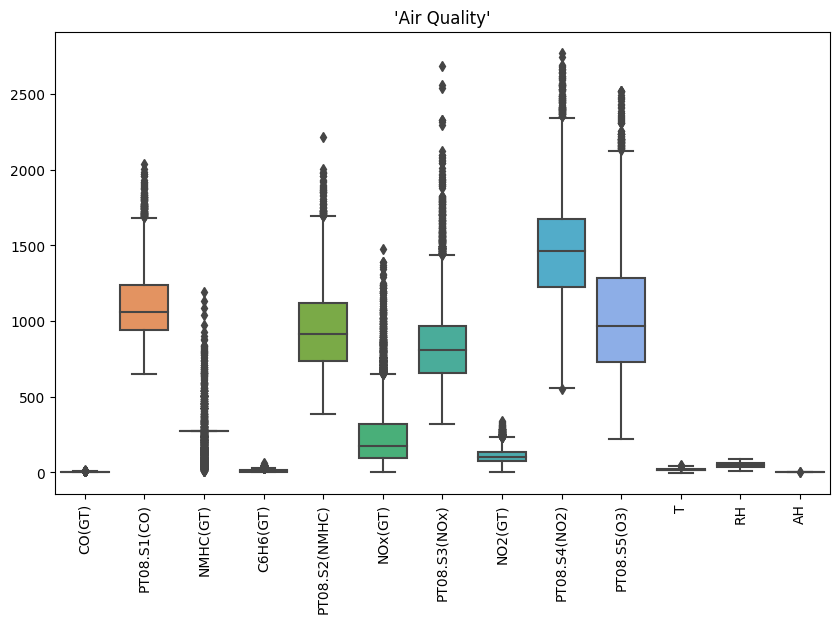

In [48]:
plot_all_box(df_air_quality, "Air Quality", fig_size=(10,6))

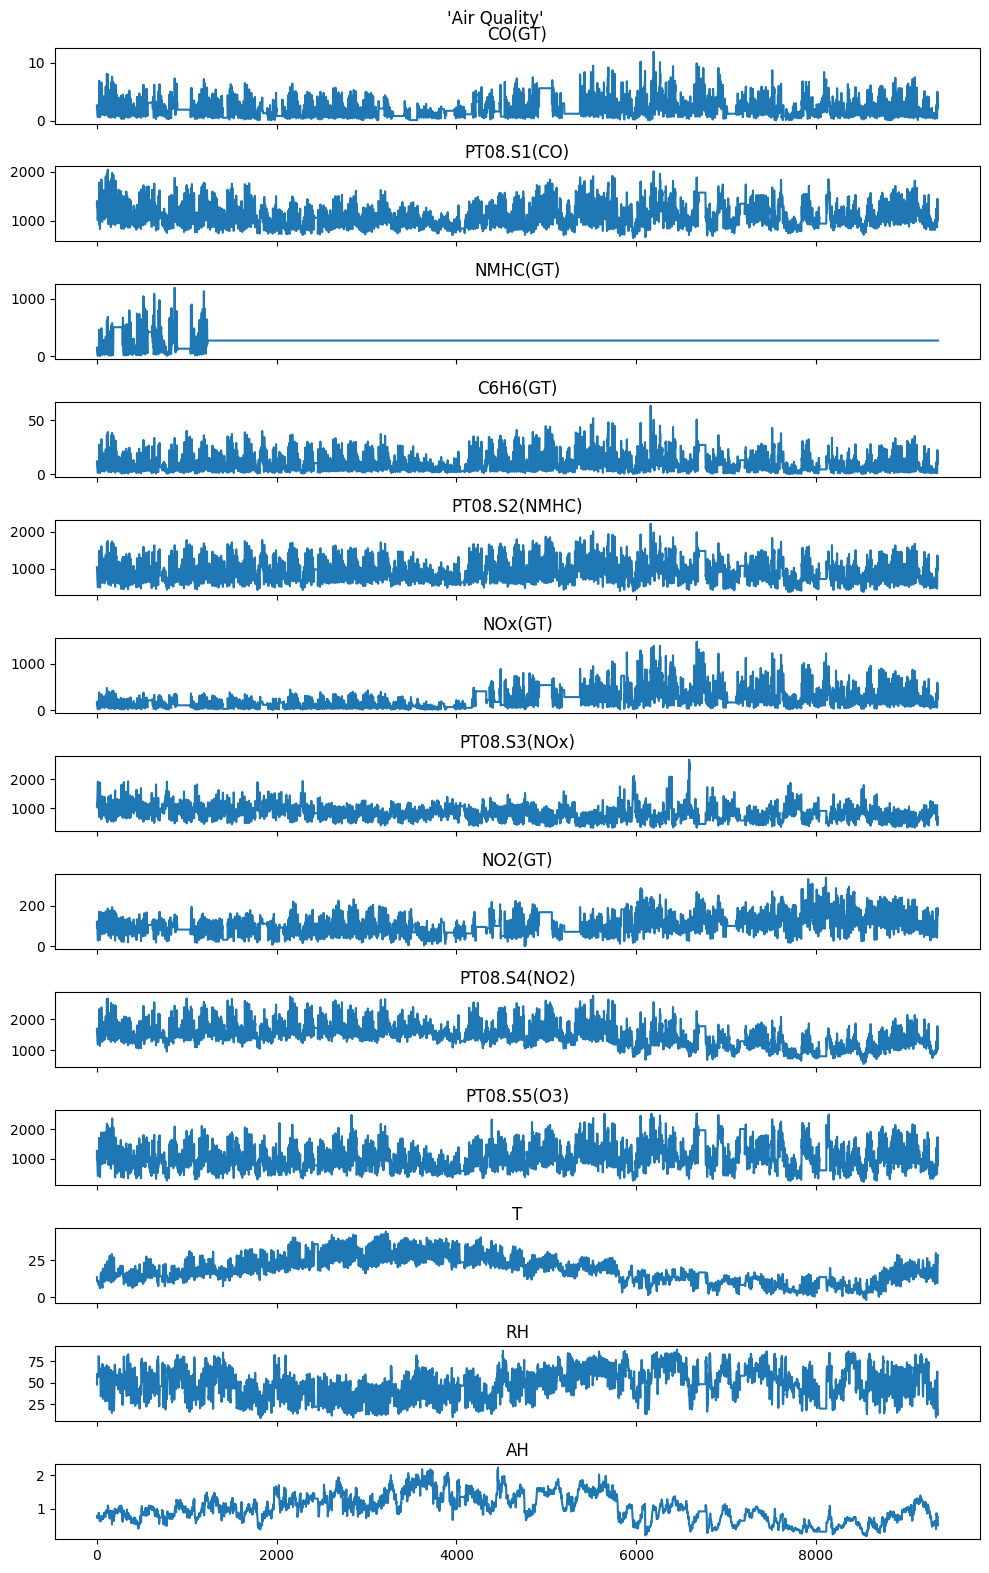

In [49]:
plot_all_ts(df_air_quality, "Air Quality", fig_size=(10,16))

In [50]:
air_quality_cols = [col for col in df_air_quality if col not in  {"Date","Time", "NMHC(GT)"}]

In [51]:
df_air_quality = df_air_quality[air_quality_cols]

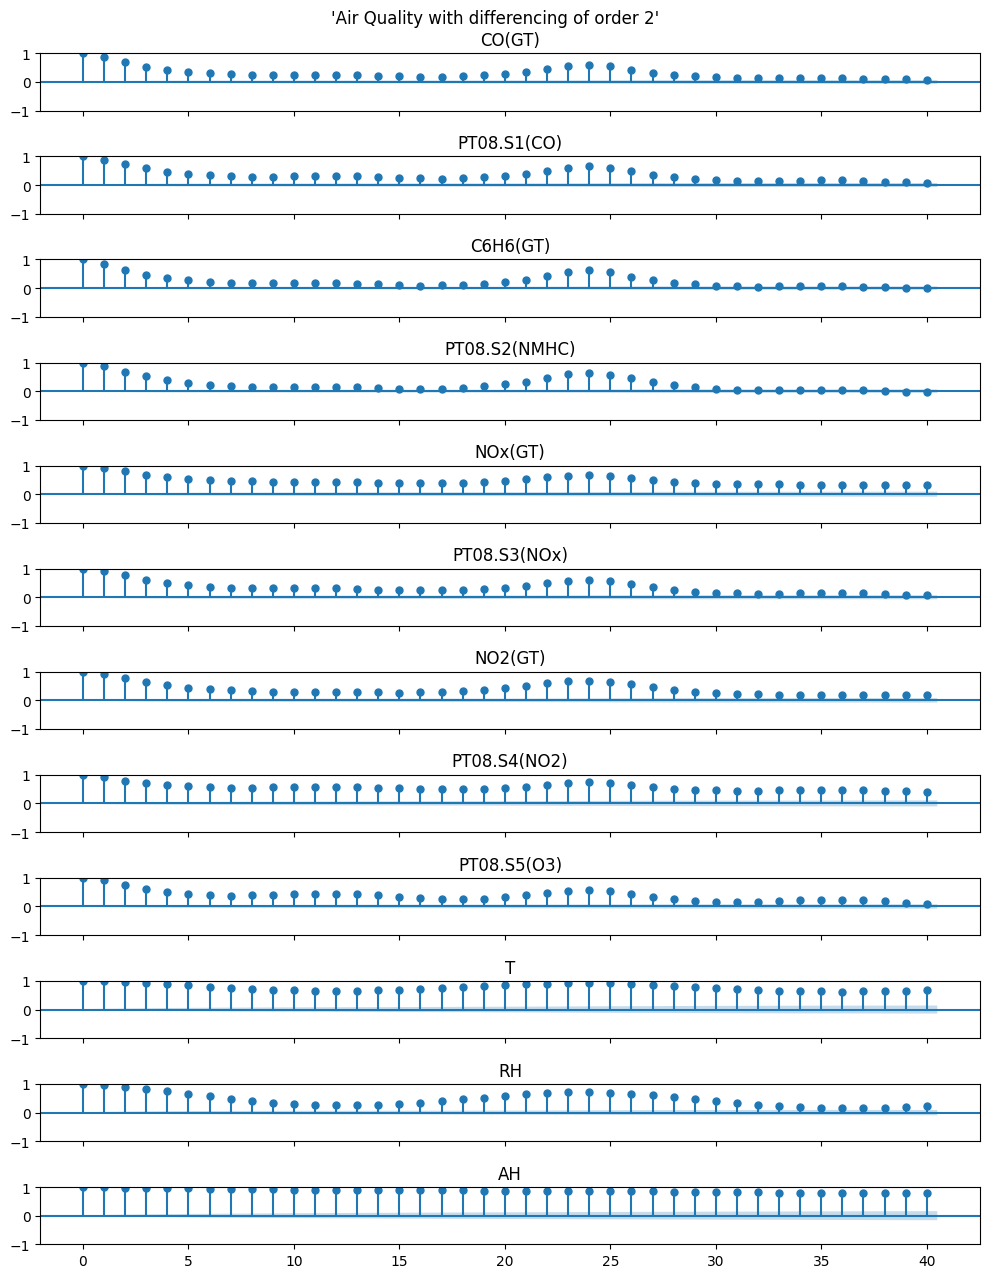

In [95]:
plot_all_acf(df_air_quality, "Air Quality with differencing of order 2", (10,13))

In [79]:
model_air = VAR(df_air_quality)

In [91]:
model_air.select_order(30).summary()

,AIC,BIC,FPE,HQIC
0,70.29,70.30,3.364e+30,70.29
1,45.48,45.60,5.672e+19,45.53
2,44.32,44.55,1.762e+19,44.39
3,44.15,44.49*,1.500e+19,44.27
4,44.05,44.50,1.348e+19,44.20
5,43.98,44.54,1.262e+19,44.17
6,43.91,44.59,1.180e+19,44.14
7,43.85,44.63,1.102e+19,44.11
8,43.78,44.67,1.033e+19,44.08
9,43.71,44.71,9.618e+18,44.05


In [53]:
adf_test(df_air_quality)

Augmented Dickey-Fuller Test: CO(GT)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S1(CO)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: C6H6(GT)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S2(NMHC)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: NOx(GT)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S3(NOx)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: NO2(GT)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S4(NO2)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: PT08.S5(O3)
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: T
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: RH
Data has no unit root and is stationary
Augmented Dickey-Fuller Test: AH
Data has no unit root and is stationary


# Train Test Split
80/20 split

## Train/Test prsa data

In [54]:
split_prsa = int(df_prsa_data.shape[0] * 0.8)

In [55]:
df_prsa_data.iloc[:split_prsa].shape[0] + df_prsa_data.iloc[split_prsa:].shape[0] == df_prsa_data.shape[0]

True

In [56]:
df_prsa_data_train = df_prsa_data.iloc[:split_prsa].copy()
df_prsa_data_test = df_prsa_data.iloc[split_prsa:].copy()

In [57]:
df_prsa_data_diff_train = df_prsa_data_diff_2.iloc[:split_prsa].copy()

In [58]:
df_prsa_data_diff_train.to_csv("../data/03_model_input/prsa_train.csv", index = False)
df_prsa_data_test.to_csv("../data/03_model_input/prsa_test.csv", index = False)


## Train/Test airquality

In [59]:
split_air_quality = int(df_air_quality.shape[0] * 0.8)

In [60]:
df_air_quality.iloc[:split_air_quality].shape[0] + df_air_quality.iloc[split_air_quality:].shape[0] == df_air_quality.shape[0]

True

In [61]:
df_air_quality_train = df_air_quality.iloc[:split_air_quality].copy()
df_air_quality_test = df_air_quality.iloc[split_air_quality:].copy()

In [62]:
df_air_quality_train.to_csv("../data/03_model_input/air_train.csv", index = False)
df_air_quality_test.to_csv("../data/03_model_input/air_test.csv", index = False)